In [26]:
# python 3.12.10
#import kagglehub
import os
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('lung_cancer_dataset.csv', keep_default_na= False)
df

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,None,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,None,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,81,Female,9.386431,Medium,No,Yes,No,Moderate,No,Yes
49996,149996,28,Male,99.471718,Medium,No,Yes,No,Moderate,No,Yes
49997,149997,90,Male,14.349722,Low,Yes,Yes,No,Heavy,Yes,Yes
49998,149998,33,Female,87.012555,Medium,No,No,Yes,Moderate,No,No


-----------------------------------------------

One hot encoding

In [3]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_columns =['gender']
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encodedOH = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
df_encodedOH.describe()

,patient_id,age,pack_years,gender_Male
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,124999.500000,58.857040,49.963424,0.498300
std,14433.901067,23.958266,28.852082,0.500002
min,100000.000000,18.000000,0.002753,0.000000
25%,112499.750000,38.000000,24.774558,0.000000
50%,124999.500000,59.000000,50.177634,0.000000
75%,137499.250000,80.000000,75.066740,1.000000
max,149999.000000,100.000000,99.999204,1.000000


----------------------------------------

Encoding the oridinal data

In [4]:
radon_categories = [['Low', 'Medium', 'High']]
asbestos_categories = [['No', 'Yes']]
second_hand_smoking_categories = [['No', 'Yes']]
copd_categories = [['No', 'Yes']]
alcohol_consumption_categories = [['None', 'Moderate', 'Heavy']]
family_history_categories = [['No', 'Yes']]
lung_cancer_categories = [['No', 'Yes']]

preprocessor = ColumnTransformer(
    transformers=[
        # (name, transformer, columns)
        ('radon_encoder', OrdinalEncoder(categories= radon_categories), ['radon_exposure']),
        ('asbestos_encoder', OrdinalEncoder(categories= asbestos_categories), ['asbestos_exposure']),
        ('second_hand_smoking_encoder', OrdinalEncoder(categories= second_hand_smoking_categories), ['secondhand_smoke_exposure']),
        ('copd_encoder', OrdinalEncoder(categories= copd_categories), ['copd_diagnosis']),
        ('alcohol_consumption_encoder', OrdinalEncoder(categories= alcohol_consumption_categories), ['alcohol_consumption']),
        ('family_history_encoder', OrdinalEncoder(categories= family_history_categories), ['family_history']),
        ('lung_cancer_encoder', OrdinalEncoder(categories= lung_cancer_categories), ['lung_cancer'])
    ],
    remainder='passthrough'
)


In [5]:
df_encoded = preprocessor.fit_transform(df_encodedOH).astype(float)
type(df_encoded)

numpy.ndarray

In [6]:
cols = ['radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagonsis', 'alcohol_consumption', 'family_history', 'lung_cancer', 'patient_id', 'age', 'packs_years', 'isMale']
finalDF = pd.DataFrame(df_encoded, columns=cols)

In [7]:
print(finalDF.describe())
print(finalDF.info())

       radon_exposure  asbestos_exposure  secondhand_smoke_exposure  \
count    50000.000000       50000.000000               50000.000000   
mean         0.999140           0.496980                   0.501340   
std          0.816353           0.499996                   0.500003   
min          0.000000           0.000000                   0.000000   
25%          0.000000           0.000000                   0.000000   
50%          1.000000           0.000000                   1.000000   
75%          2.000000           1.000000                   1.000000   
max          2.000000           1.000000                   1.000000   

       copd_diagonsis  alcohol_consumption  family_history   lung_cancer  \
count    50000.000000         50000.000000    50000.000000  50000.000000   
mean         0.501320             1.002000        0.499660      0.687280   
std          0.500003             0.817612        0.500005      0.463606   
min          0.000000             0.000000        0.0000

<Axes: >

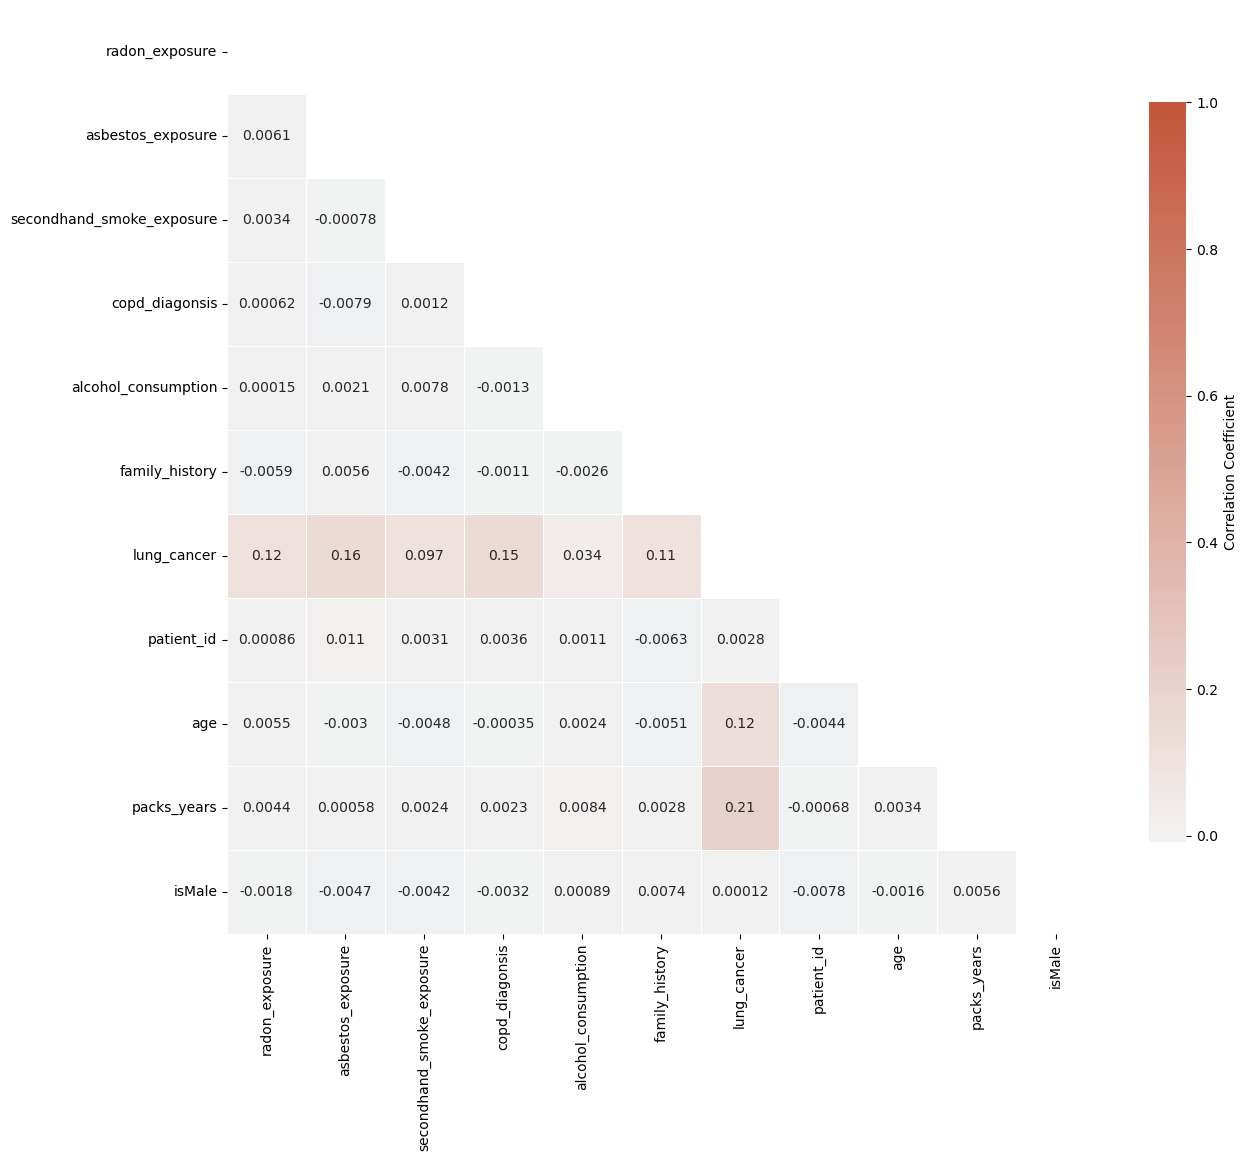

In [8]:
# Get the correlation of each pair of coloumns in the dataframe
correlation_matrix = finalDF.corr()

# Create a mask tro remove the diagonals that are always 1
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))

# create the figure 
f, ax = plt.subplots(figsize=(14,12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, 
            mask=mask, 
            cmap=cmap, 
            vmax= 1.0, 
            center= 0.0, 
            square= False, 
            linewidths= 0.5, 
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}, #Bar on the right
            annot=True
        )

In [9]:
finalDF

,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagonsis,alcohol_consumption,family_history,lung_cancer,patient_id,age,packs_years,isMale
0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,100000.0,69.0,66.025244,1.0
1,2.0,0.0,1.0,1.0,1.0,1.0,1.0,100001.0,32.0,12.780800,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,100002.0,89.0,0.408278,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,100003.0,78.0,44.065232,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,100004.0,38.0,44.432440,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,0.0,1.0,0.0,1.0,0.0,1.0,149995.0,81.0,9.386431,0.0
49996,1.0,0.0,1.0,0.0,1.0,0.0,1.0,149996.0,28.0,99.471718,1.0
49997,0.0,1.0,1.0,0.0,2.0,1.0,1.0,149997.0,90.0,14.349722,1.0
49998,1.0,0.0,0.0,1.0,1.0,0.0,0.0,149998.0,33.0,87.012555,0.0


In [15]:
# standardized_df = (df - df.mean()) / df.std())
finalDF = finalDF.drop(['patient_id'], axis=1)

# age
tempDF = (finalDF['age'] - finalDF['age'].mean()) / finalDF['age'].std()
finalDF['age'] = tempDF

# packs_years
tempDF = (finalDF['packs_years'] - finalDF['packs_years'].mean()) / finalDF['packs_years'].std()
finalDF['packs_years'] = tempDF

# radon_exposure
tempDF = (finalDF['radon_exposure'] - finalDF['radon_exposure'].mean()) / finalDF['radon_exposure'].std()
finalDF['radon_exposure'] = tempDF

# alcohol_comsumption
tempDF = (finalDF['alcohol_consumption'] - finalDF['alcohol_consumption'].mean()) / finalDF['alcohol_consumption'].std()
finalDF['alcohol_consumption'] = tempDF

finalDF.describe()

,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagonsis,alcohol_consumption,family_history,lung_cancer,age,packs_years,isMale
count,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000
mean,8.242296e-17,0.496980,0.501340,0.501320,4.099832e-17,0.499660,0.687280,3.566925e-17,-1.115552e-17,0.498300
std,1.000000e+00,0.499996,0.500003,0.500003,1.000000e+00,0.500005,0.463606,1.000000e+00,1.000000e+00,0.500002
min,-1.223906e+00,0.000000,0.000000,0.000000,-1.225520e+00,0.000000,0.000000,-1.705342e+00,-1.731614e+00,0.000000
25%,-1.223906e+00,0.000000,0.000000,0.000000,-1.225520e+00,0.000000,0.000000,-8.705572e-01,-8.730346e-01,0.000000
50%,1.053466e-03,0.000000,1.000000,1.000000,-2.446148e-03,0.000000,1.000000,5.967043e-03,7.424438e-03,0.000000
75%,1.226013e+00,1.000000,1.000000,1.000000,1.220628e+00,1.000000,1.000000,8.824912e-01,8.700695e-01,1.000000
max,1.226013e+00,1.000000,1.000000,1.000000,1.220628e+00,1.000000,1.000000,1.717276e+00,1.734217e+00,1.000000


In [16]:
file_path = "output.csv"

if os.path.exists(file_path):
    os.remove(file_path)

finalDF.to_csv(file_path, index=False)

In [23]:
X = finalDF.drop(['lung_cancer'], axis=1)
y = finalDF['lung_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn5, f)

